In [ ]:
#!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.4 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import recall_score

import xgboost as xgb
from catboost import CatBoostClassifier
import lightgbm as lgb

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/mda/Trabajo Final/Data/hypothyroid.csv'

### Visualizar la data

In [ ]:
data = pd.read_csv(data_path)
data.head()

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid  ... TT4 measured  \
0        f               f              f                 f  ...            t   
1        f               f              f                 f  ...            t   
2        f               f              f                 f  ...            t   
3        f               f              f                 f  ...            t   
4        f               f              f                 f  ...            t   

   TT4 T4U measured   T4U FTI measured  FTI TBG measured TBG referral source  \
0  125            t  1.14            t  109            f   ?            SVHC   
1  102            f     ?            f    ?            f   ?           other   
2  109            t  0.91            t  120            f   ?           other   
3  175            f     ?            f    ?            f   ?           other   
4   61            t  0.87            t   70            f   ?             SVI   

  binaryClass  
0           P  
1           P  
2           P  
3           P  
4           P  

[5 rows x 30 columns]

In [ ]:
data.shape

(3772, 30)

In [ ]:
data.dtypes

age                          object
sex                          object
on thyroxine                 object
query on thyroxine           object
on antithyroid medication    object
sick                         object
pregnant                     object
thyroid surgery              object
I131 treatment               object
query hypothyroid            object
query hyperthyroid           object
lithium                      object
goitre                       object
tumor                        object
hypopituitary                object
psych                        object
TSH measured                 object
TSH                          object
T3 measured                  object
T3                           object
TT4 measured                 object
TT4                          object
T4U measured                 object
T4U                          object
FTI measured                 object
FTI                          object
TBG measured                 object
TBG                         

In [ ]:
data['binaryClass'].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

In [ ]:
data['sex'].value_counts()

F    2480
M    1142
?     150
Name: sex, dtype: int64

### Reemplazar los valores "?" por nan

In [ ]:
data.replace('?', np.nan, inplace=True)

In [ ]:
data.head()

age sex on thyroxine query on thyroxine on antithyroid medication sick  \
0  41   F            f                  f                         f    f   
1  23   F            f                  f                         f    f   
2  46   M            f                  f                         f    f   
3  70   F            t                  f                         f    f   
4  70   F            f                  f                         f    f   

  pregnant thyroid surgery I131 treatment query hypothyroid  ... TT4 measured  \
0        f               f              f                 f  ...            t   
1        f               f              f                 f  ...            t   
2        f               f              f                 f  ...            t   
3        f               f              f                 f  ...            t   
4        f               f              f                 f  ...            t   

   TT4 T4U measured   T4U FTI measured  FTI TBG measured TBG referral source  \
0  125            t  1.14            t  109            f NaN            SVHC   
1  102            f   NaN            f  NaN            f NaN           other   
2  109            t  0.91            t  120            f NaN           other   
3  175            f   NaN            f  NaN            f NaN           other   
4   61            t  0.87            t   70            f NaN             SVI   

  binaryClass  
0           P  
1           P  
2           P  
3           P  
4           P  

[5 rows x 30 columns]

In [ ]:
data.isna().sum()

age                             1
sex                           150
on thyroxine                    0
query on thyroxine              0
on antithyroid medication       0
sick                            0
pregnant                        0
thyroid surgery                 0
I131 treatment                  0
query hypothyroid               0
query hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
TSH measured                    0
TSH                           369
T3 measured                     0
T3                            769
TT4 measured                    0
TT4                           231
T4U measured                    0
T4U                           387
FTI measured                    0
FTI                           385
TBG measured                    0
TBG                          3772
referral source                 0
binaryClass   

La columna "TBG" está completamente vacía, se procederá a eliminarla

In [ ]:
del data['TBG']

In [ ]:
data['sex'].value_counts()

F    2480
M    1142
Name: sex, dtype: int64

In [ ]:
data['on thyroxine'].value_counts()

f    3308
t     464
Name: on thyroxine, dtype: int64

In [ ]:
data['query on thyroxine'].value_counts()

f    3722
t      50
Name: query on thyroxine, dtype: int64

In [ ]:
data['on antithyroid medication'].value_counts()

f    3729
t      43
Name: on antithyroid medication, dtype: int64

In [ ]:
data['sick'].value_counts()

f    3625
t     147
Name: sick, dtype: int64

In [ ]:
data['pregnant'].value_counts()

f    3719
t      53
Name: pregnant, dtype: int64

In [ ]:
data['thyroid surgery'].value_counts()

f    3719
t      53
Name: thyroid surgery, dtype: int64

In [ ]:
data['I131 treatment'].value_counts()

f    3713
t      59
Name: I131 treatment, dtype: int64

In [ ]:
data['query hypothyroid'].value_counts()

f    3538
t     234
Name: query hypothyroid, dtype: int64

In [ ]:
data['query hyperthyroid'].value_counts()

f    3535
t     237
Name: query hyperthyroid, dtype: int64

In [ ]:
data['lithium'].value_counts()

f    3754
t      18
Name: lithium, dtype: int64

In [ ]:
data['goitre'].value_counts()

f    3738
t      34
Name: goitre, dtype: int64

In [ ]:
data['tumor'].value_counts()

f    3676
t      96
Name: tumor, dtype: int64

In [ ]:
data['hypopituitary'].value_counts() #######################

f    3771
t       1
Name: hypopituitary, dtype: int64

In [ ]:
data['psych'].value_counts()

f    3588
t     184
Name: psych, dtype: int64

In [ ]:
data['TSH measured'].value_counts()

t    3403
f     369
Name: TSH measured, dtype: int64

In [ ]:
data['T3 measured'].value_counts()

t    3003
f     769
Name: T3 measured, dtype: int64

In [ ]:
data['TT4 measured'].value_counts()

t    3541
f     231
Name: TT4 measured, dtype: int64

In [ ]:
data['T4U measured'].value_counts()

t    3385
f     387
Name: T4U measured, dtype: int64

In [ ]:
data['FTI measured'].value_counts()

t    3387
f     385
Name: FTI measured, dtype: int64

In [ ]:
data['TBG measured'].value_counts() ###########

f    3772
Name: TBG measured, dtype: int64

Esta variable "TBG measured" solo tiene una clase, se propone eliminarla

In [ ]:
del data['TBG measured']

In [ ]:
data['referral source'].value_counts()

other    2201
SVI      1034
SVHC      386
STMW      112
SVHD       39
Name: referral source, dtype: int64

Variable sin valor para entrenamiento de modelos

In [ ]:
del data['referral source']

In [ ]:
data['binaryClass'].value_counts()

P    3481
N     291
Name: binaryClass, dtype: int64

Las columnas finales se muestran a continuación

In [ ]:
data.columns

Index(['age', 'sex', 'on thyroxine', 'query on thyroxine',
       'on antithyroid medication', 'sick', 'pregnant', 'thyroid surgery',
       'I131 treatment', 'query hypothyroid', 'query hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH measured', 'TSH',
       'T3 measured', 'T3', 'TT4 measured', 'TT4', 'T4U measured', 'T4U',
       'FTI measured', 'FTI', 'binaryClass'],
      dtype='object')

### Reemplazar "t" y "f" por 1 y 0, respectivamente

In [ ]:
data.replace({'t':1,'f':0}, inplace= True)

In [ ]:
data.head()

age sex  on thyroxine  query on thyroxine  on antithyroid medication  sick  \
0  41   F             0                   0                          0     0   
1  23   F             0                   0                          0     0   
2  46   M             0                   0                          0     0   
3  70   F             1                   0                          0     0   
4  70   F             0                   0                          0     0   

   pregnant  thyroid surgery  I131 treatment  query hypothyroid  ...   TSH  \
0         0                0               0                  0  ...   1.3   
1         0                0               0                  0  ...   4.1   
2         0                0               0                  0  ...  0.98   
3         0                0               0                  0  ...  0.16   
4         0                0               0                  0  ...  0.72   

   T3 measured   T3  TT4 measured  TT4  T4U measured   T4U FTI measured  FTI  \
0            1  2.5             1  125             1  1.14            1  109   
1            1    2             1  102             0   NaN            0  NaN   
2            0  NaN             1  109             1  0.91            1  120   
3            1  1.9             1  175             0   NaN            0  NaN   
4            1  1.2             1   61             1  0.87            1   70   

  binaryClass  
0           P  
1           P  
2           P  
3           P  
4           P  

[5 rows x 27 columns]

### Otras variables categoricas

In [ ]:
data['binaryClass'] = LabelEncoder().fit_transform(data['binaryClass'])
data.replace({"F":1,"M":0}, inplace=True) # Debido a que tiene valores na

In [ ]:
data.head()

age  sex  on thyroxine  query on thyroxine  on antithyroid medication  sick  \
0  41  1.0             0                   0                          0     0   
1  23  1.0             0                   0                          0     0   
2  46  0.0             0                   0                          0     0   
3  70  1.0             1                   0                          0     0   
4  70  1.0             0                   0                          0     0   

   pregnant  thyroid surgery  I131 treatment  query hypothyroid  ...   TSH  \
0         0                0               0                  0  ...   1.3   
1         0                0               0                  0  ...   4.1   
2         0                0               0                  0  ...  0.98   
3         0                0               0                  0  ...  0.16   
4         0                0               0                  0  ...  0.72   

   T3 measured   T3  TT4 measured  TT4  T4U measured   T4U FTI measured  FTI  \
0            1  2.5             1  125             1  1.14            1  109   
1            1    2             1  102             0   NaN            0  NaN   
2            0  NaN             1  109             1  0.91            1  120   
3            1  1.9             1  175             0   NaN            0  NaN   
4            1  1.2             1   61             1  0.87            1   70   

  binaryClass  
0           1  
1           1  
2           1  
3           1  
4           1  

[5 rows x 27 columns]

In [ ]:
data['binaryClass'].value_counts()

1    3481
0     291
Name: binaryClass, dtype: int64

In [ ]:
data['sex'].value_counts()

1.0    2480
0.0    1142
Name: sex, dtype: int64

In [ ]:
data.isna().sum()

age                            1
sex                          150
on thyroxine                   0
query on thyroxine             0
on antithyroid medication      0
sick                           0
pregnant                       0
thyroid surgery                0
I131 treatment                 0
query hypothyroid              0
query hyperthyroid             0
lithium                        0
goitre                         0
tumor                          0
hypopituitary                  0
psych                          0
TSH measured                   0
TSH                          369
T3 measured                    0
T3                           769
TT4 measured                   0
TT4                          231
T4U measured                   0
T4U                          387
FTI measured                   0
FTI                          385
binaryClass                    0
dtype: int64

### Completar valores nulos

In [ ]:
imputer = SimpleImputer(strategy='mean')
data['age'] = imputer.fit_transform(data[['age']])

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
data['sex'] = imputer.fit_transform(data[['sex']])

In [ ]:
imputer = SimpleImputer(strategy='mean')
data['TSH'] = imputer.fit_transform(data['TSH'].values.reshape(-1, 1))

In [ ]:
data['T3'] = imputer.fit_transform(data['T3'].values.reshape(-1, 1))

In [ ]:
data['TT4'] = imputer.fit_transform(data['TT4'].values.reshape(-1, 1))

In [ ]:
data['T4U'] = imputer.fit_transform(data['T4U'].values.reshape(-1, 1))

In [ ]:
data['FTI'] = imputer.fit_transform(data['FTI'].values.reshape(-1, 1))

In [ ]:
data.head()

age  sex  on thyroxine  query on thyroxine  on antithyroid medication  \
0  41.0  1.0             0                   0                          0   
1  23.0  1.0             0                   0                          0   
2  46.0  0.0             0                   0                          0   
3  70.0  1.0             1                   0                          0   
4  70.0  1.0             0                   0                          0   

   sick  pregnant  thyroid surgery  I131 treatment  query hypothyroid  ...  \
0     0         0                0               0                  0  ...   
1     0         0                0               0                  0  ...   
2     0         0                0               0                  0  ...   
3     0         0                0               0                  0  ...   
4     0         0                0               0                  0  ...   

    TSH  T3 measured      T3  TT4 measured    TT4  T4U measured    T4U  \
0  1.30            1  2.5000             1  125.0             1  1.140   
1  4.10            1  2.0000             1  102.0             0  0.995   
2  0.98            0  2.0135             1  109.0             1  0.910   
3  0.16            1  1.9000             1  175.0             0  0.995   
4  0.72            1  1.2000             1   61.0             1  0.870   

   FTI measured         FTI  binaryClass  
0             1  109.000000            1  
1             0  110.469649            1  
2             1  120.000000            1  
3             0  110.469649            1  
4             1   70.000000            1  

[5 rows x 27 columns]

In [ ]:
data.isna().sum()

age                          0
sex                          0
on thyroxine                 0
query on thyroxine           0
on antithyroid medication    0
sick                         0
pregnant                     0
thyroid surgery              0
I131 treatment               0
query hypothyroid            0
query hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
TSH measured                 0
TSH                          0
T3 measured                  0
T3                           0
TT4 measured                 0
TT4                          0
T4U measured                 0
T4U                          0
FTI measured                 0
FTI                          0
binaryClass                  0
dtype: int64

### Guardar la nueva data

In [ ]:
#data.to_csv('dataFinal/data_final.csv', index=False)

### Análisis univariado y bivariado

#### Prueba de normalidad

In [ ]:
ss.shapiro(data['age'])

ShapiroResult(statistic=0.9069345593452454, pvalue=3.615350037958028e-43)

In [ ]:
ss.shapiro(data['TSH'])

ShapiroResult(statistic=0.15284204483032227, pvalue=0.0)

In [ ]:
ss.shapiro(data['T3'])

ShapiroResult(statistic=0.8519548177719116, pvalue=0.0)

In [ ]:
ss.shapiro(data['TT4'])

ShapiroResult(statistic=0.9206268787384033, pvalue=1.0023207655622552e-40)

In [ ]:
ss.shapiro(data['T4U'])

ShapiroResult(statistic=0.9125322103500366, pvalue=3.3056630773422435e-42)

In [ ]:
ss.shapiro(data['FTI'])

ShapiroResult(statistic=0.8896213173866272, pvalue=1.401298464324817e-45)

Con una confianza del 95%, las variables todas las variables numéricas
no se aproximan a una distribución normal, pues el pvalor < 5%

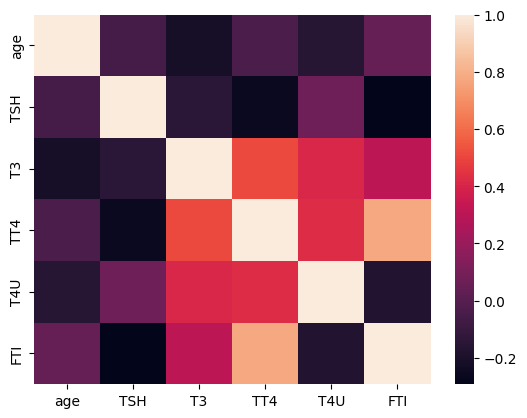

In [ ]:
sns.heatmap(data.loc[:,['age','TSH','T3','TT4', 'T4U', 'FTI']].corr(method = "pearson"))
plt.show()

In [ ]:
data.loc[:,['age','TSH','T3','TT4', 'T4U', 'FTI']].corr(method = "pearson")

age       TSH        T3       TT4       T4U       FTI
age  1.000000 -0.056167 -0.214925 -0.037609 -0.157523  0.050017
TSH -0.056167  1.000000 -0.147331 -0.261300  0.071028 -0.293023
T3  -0.214925 -0.147331  1.000000  0.509065  0.407242  0.308837
TT4 -0.037609 -0.261300  0.509065  1.000000  0.426484  0.779101
T4U -0.157523  0.071028  0.407242  0.426484  1.000000 -0.174005
FTI  0.050017 -0.293023  0.308837  0.779101 -0.174005  1.000000

In [ ]:
ss.pearsonr(data['TT4'],data['FTI'])

PearsonRResult(statistic=0.7791005162695955, pvalue=0.0)

Prueba de Correlación:
- Ho: no existe correlación entre las variables
- Ha: existe correlación entre las variables

Con un nivel de confianza del 95%, se rechaza la Ho, pues el pvalor < 5%,
se concluye que las variables 'Total minutes' y 'Total charge' están correlacionadas
Por otro lado, el grado de correlación entres las variables es de 0.7791005162695956

In [ ]:
data['binaryClass'].dtype

dtype('int64')

In [ ]:
100*data['binaryClass'].value_counts(normalize=True)

1    92.28526
0     7.71474
Name: binaryClass, dtype: float64

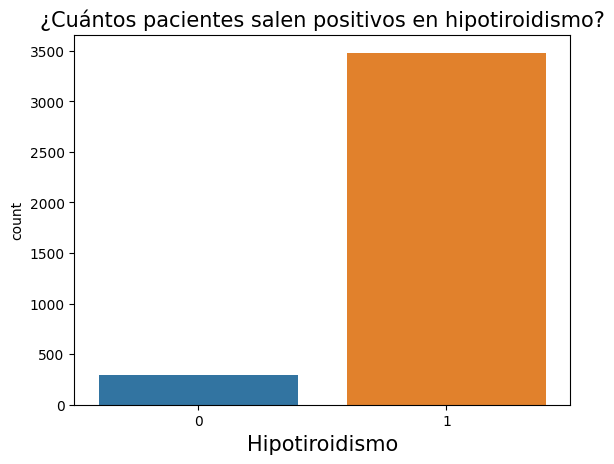

In [ ]:
sns.countplot(data = data, x = 'binaryClass')
plt.xlabel('Hipotiroidismo', fontsize = 15)
plt.title('¿Cuántos pacientes salen positivos en hipotiroidismo?', fontsize = 15)
plt.show()

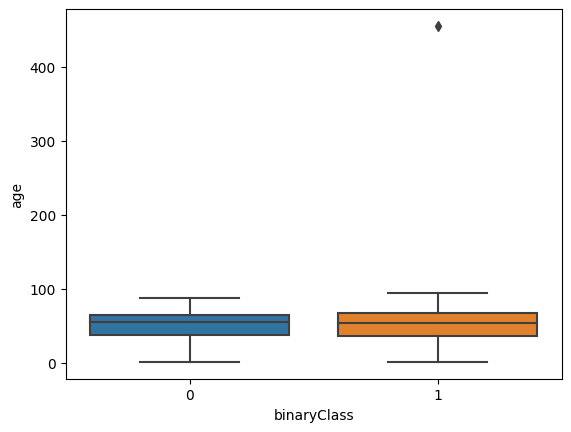

In [ ]:
sns.boxplot(x='binaryClass',y='age',data=data)
plt.show()

In [ ]:
data= data[(data['age'] <= 200)]

In [ ]:
data.shape

(3771, 27)

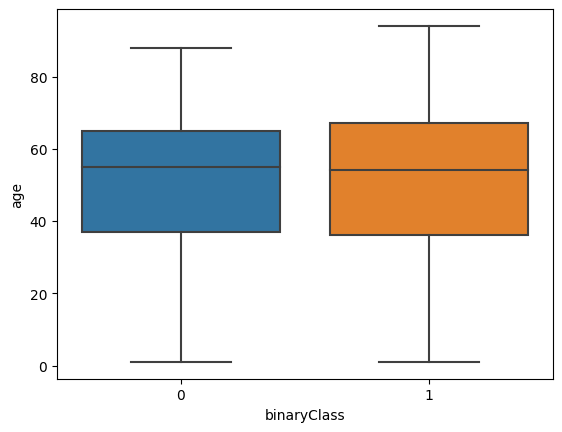

In [ ]:
sns.boxplot(x='binaryClass',y='age',data=data)
plt.show()

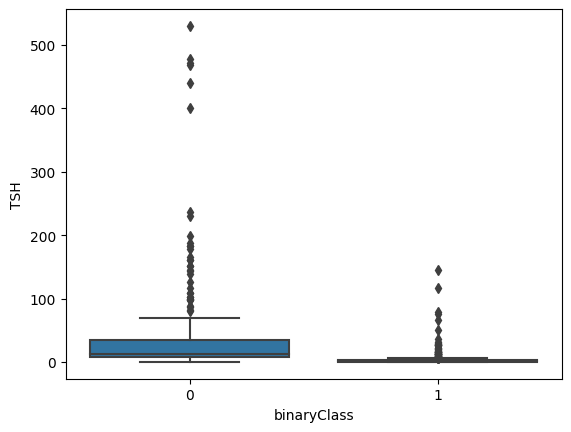

In [ ]:
sns.boxplot(x='binaryClass',y='TSH',data=data)
plt.show()

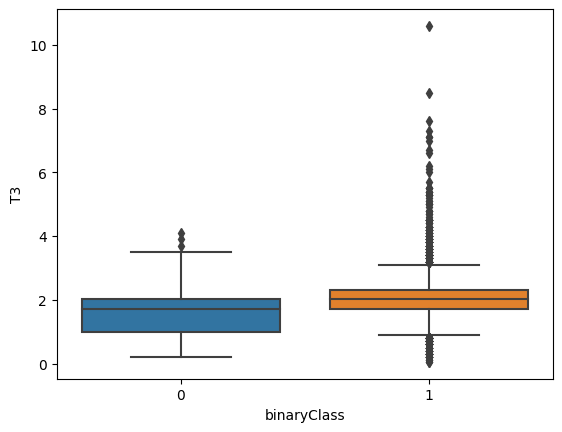

In [ ]:
sns.boxplot(x='binaryClass',y='T3',data=data)
plt.show()

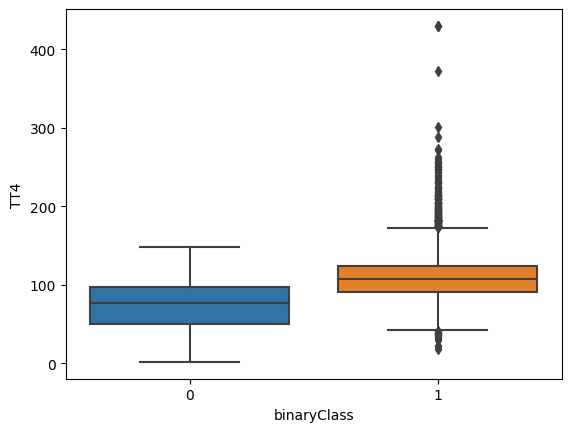

In [ ]:
sns.boxplot(x='binaryClass',y='TT4',data=data)
plt.show()

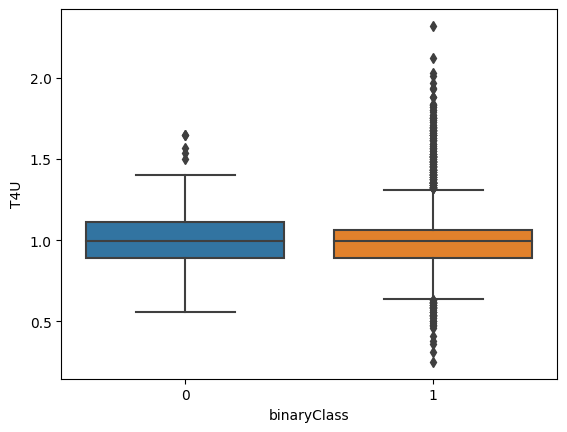

In [ ]:
sns.boxplot(x='binaryClass',y='T4U',data=data)
plt.show()

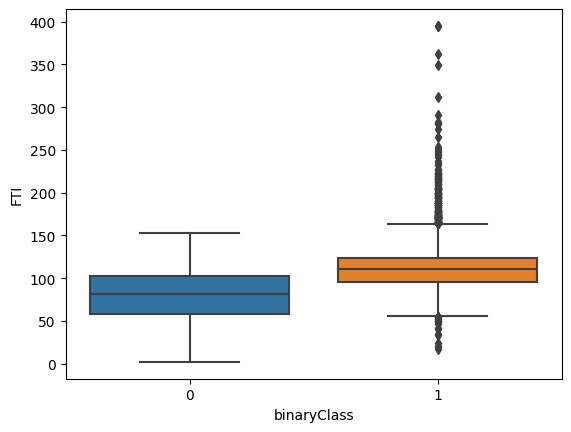

In [ ]:
sns.boxplot(x='binaryClass',y='FTI',data=data)
plt.show()

In [ ]:
X = data[[var for var in data.columns if var not in ['age', 'binaryClass']]]
y = data['binaryClass']

In [ ]:
X = X.to_numpy()

# Entrenamiento de modelos

In [ ]:
def entrenamiento_modelo(X_var, y_var, modelo:str, balance:str):

    if balance=='S':
        smt = SMOTE()
        X_smote, y_smote = smt.fit_resample(X_var, y_var)
        X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.20, random_state = 0)

    elif balance=='O':
        oversample = RandomOverSampler()
        X_over, y_over = oversample.fit_resample(X_var, y_var)
        X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.20, random_state = 0)

    elif balance=='U':
        undersample = RandomUnderSampler()
        X_under, y_under = undersample.fit_resample(X_var, y_var)
        X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.20, random_state = 0)

    elif balance=='None':
        X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.20, random_state = 0)

    # Split y escalado
    X_train_orig = X_train
    X_test_orig = X_test
    X_train = StandardScaler().fit_transform(X_train)
    X_test = StandardScaler().fit_transform(X_test)


    # Clasificador
    if modelo=='XGB':
        param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700], 'learning_rate': [0.01, 0.1, 0.2]}
        grid = GridSearchCV(xgb.XGBClassifier(),param_grid,refit=True,verbose=1,cv=5)
        grid.fit(X_train, y_train)
        classifier = grid.best_estimator_

    elif modelo=='CATB':
        param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],'learning_rate': [0.01, 0.1, 0.2]}
        grid = GridSearchCV(CatBoostClassifier(),param_grid,refit=True,verbose=1,cv=5)
        grid.fit(X_train,y_train)
        classifier = grid.best_estimator_

    elif modelo=='LGBM':
        param_grid = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],'n_estimators': [50, 100, 200, 300, 400, 500, 600, 700] ,'learning_rate': [0.01, 0.1, 0.2]}
        grid = GridSearchCV(lgb.LGBMClassifier(),param_grid,refit=True,verbose=1,cv=5,scoring='accuracy')
        grid.fit(X_train,y_train)
        classifier = grid.best_estimator_

    print('Mejor clasificador',classifier)
    y_pred = classifier.predict(X_test)


    # Plot 1
    titles_options = [("Confusion matrix, without normalization", None),
                    ("Normalized confusion matrix", 'true')]
    for title, normalize in titles_options:
        disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                                    #display_labels=y_test,
                                                    cmap=plt.cm.Blues,
                                                    normalize=normalize)
        disp.ax_.set_title(title)

        print(title)
        print(disp.confusion_matrix)

    plt.show()

    y_pred_prob = classifier.predict_proba(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
    roc_auc = auc(false_positive_rate, true_positive_rate)


    # Plot 2
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],linestyle='--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    # Data final
    #dataf = pd.concat([pd.DataFrame(X_test_orig).reset_index(drop=True),pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True),pd.DataFrame(y_pred_prob).reset_index(drop=True)],axis=1)
    #dataf.columns = []

    return recall_score(y_test, y_pred), roc_auc, 2*roc_auc - 1, classifier

### Pruebas con XGB

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejor clasificador XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Confusion matrix, without normalization
[[ 61   7]
 [  0 687]]
Normalized confusion matrix
[[0.89705882 0.10294118]
 [0.         1.        ]]


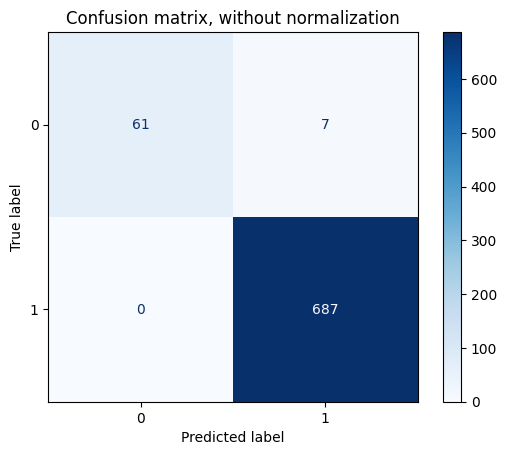

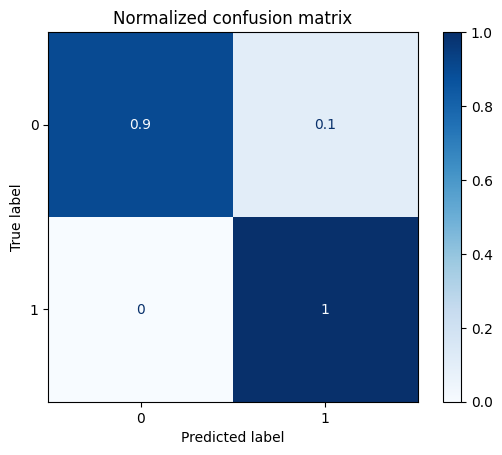

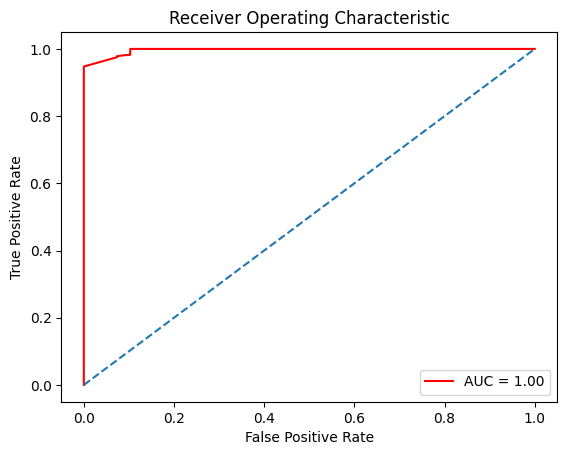

In [ ]:
sensibilidad_xgm, roc_xgb, gini_xgb, classifier_xgb = entrenamiento_modelo(X, y, 'XGB', 'None')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejor clasificador XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Confusion matrix, without normalization
[[707  14]
 [  4 667]]
Normalized confusion matrix
[[0.98058252 0.01941748]
 [0.00596125 0.99403875]]


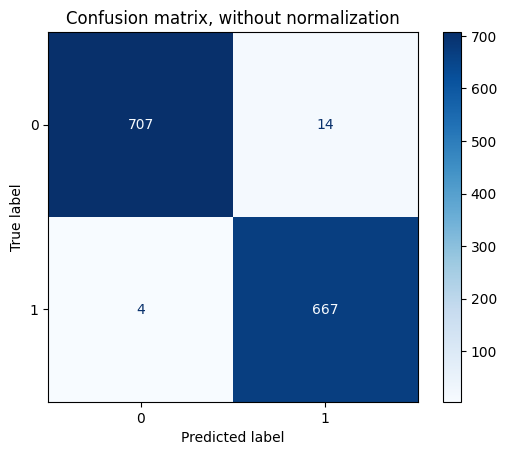

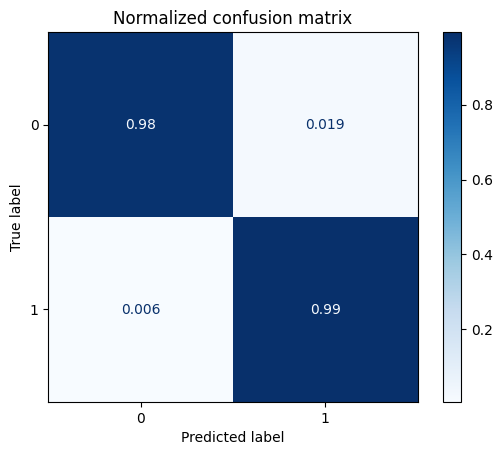

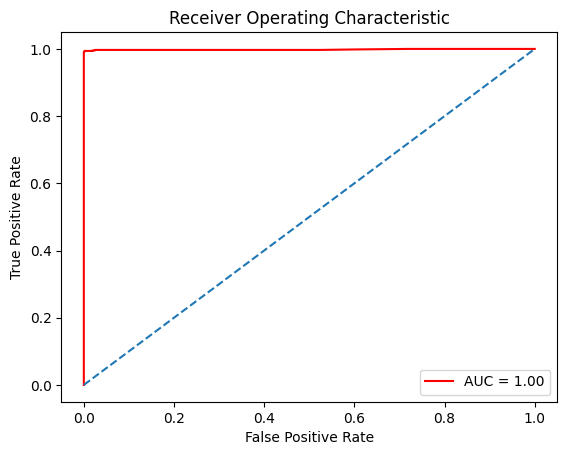

In [ ]:
sensibilidad_xgm_smote, roc_xgb_smote, gini_xgb_smote, classifier_xgb_smote = entrenamiento_modelo(X, y, 'XGB', 'S')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejor clasificador XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Confusion matrix, without normalization
[[620 101]
 [  1 670]]
Normalized confusion matrix
[[0.85991678 0.14008322]
 [0.00149031 0.99850969]]


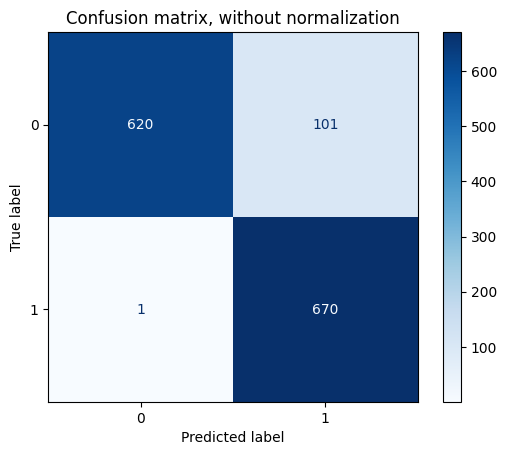

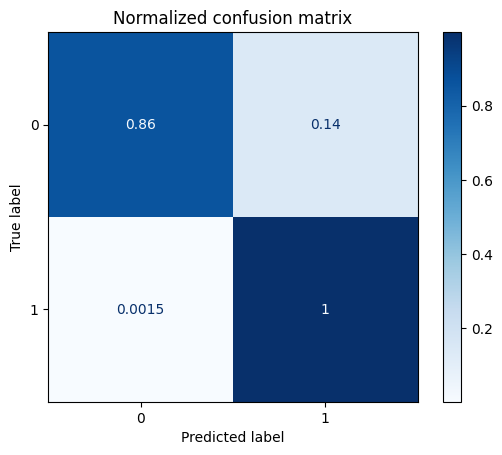

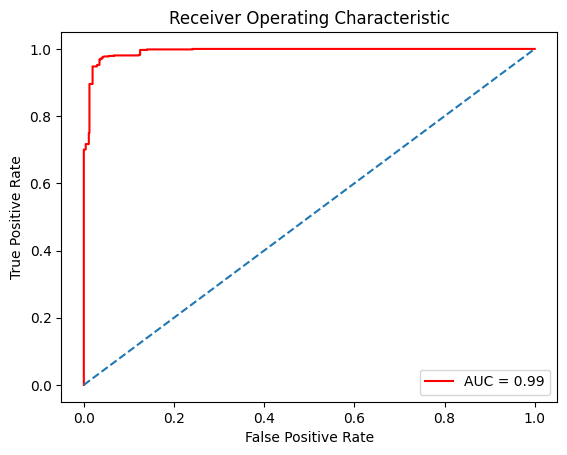

In [ ]:
sensibilidad_xgm_over, roc_xgb_over, gini_xgb_over, classifier_xgb_over = entrenamiento_modelo(X, y, 'XGB', 'O')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Mejor clasificador XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Confusion matrix, without normalization
[[51  9]
 [ 0 57]]
Normalized confusion matrix
[[0.85 0.15]
 [0.   1.  ]]


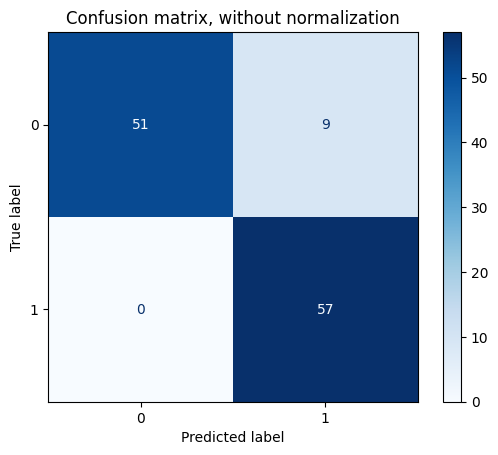

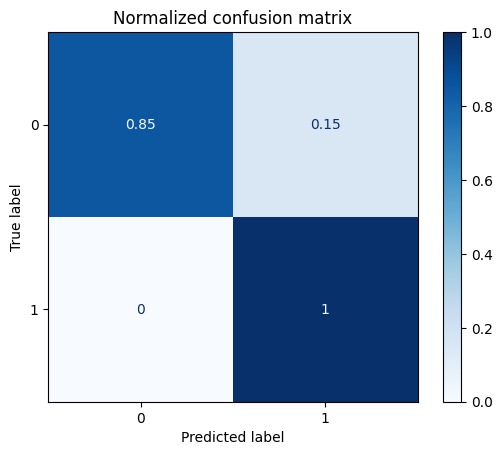

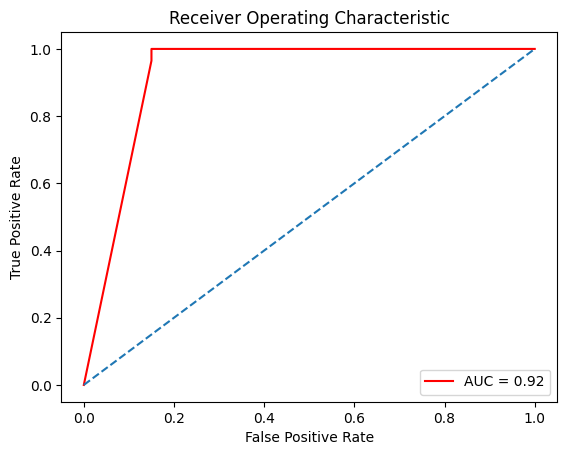

In [ ]:
sensibilidad_xgm_under, roc_xgb_under, gini_xgb_under, classifier_xgb_under = entrenamiento_modelo(X, y, 'XGB', 'U')

### Pruebas con CatB

Se han truncado las últimas 5000 líneas del flujo de salida.
7:	learn: 0.0167789	total: 171ms	remaining: 21.2s
8:	learn: 0.0139848	total: 195ms	remaining: 21.4s
9:	learn: 0.0126434	total: 224ms	remaining: 22.1s
10:	learn: 0.0105035	total: 257ms	remaining: 23.1s
11:	learn: 0.0098564	total: 280ms	remaining: 23.1s
12:	learn: 0.0089744	total: 304ms	remaining: 23.1s
13:	learn: 0.0078386	total: 329ms	remaining: 23.1s
14:	learn: 0.0073288	total: 352ms	remaining: 23.1s
15:	learn: 0.0071139	total: 376ms	remaining: 23.1s
16:	learn: 0.0062482	total: 401ms	remaining: 23.2s
17:	learn: 0.0059936	total: 424ms	remaining: 23.2s
18:	learn: 0.0056910	total: 460ms	remaining: 23.7s
19:	learn: 0.0053112	total: 484ms	remaining: 23.7s
20:	learn: 0.0049952	total: 509ms	remaining: 23.7s
21:	learn: 0.0045184	total: 535ms	remaining: 23.8s
22:	learn: 0.0043372	total: 562ms	remaining: 23.9s
23:	learn: 0.0041184	total: 585ms	remaining: 23.8s
24:	learn: 0.0039610	total: 609ms	remaining: 23.7s
25:	learn: 0.0035545	tot

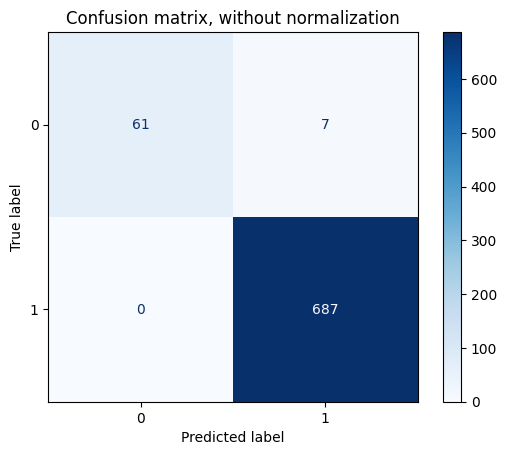

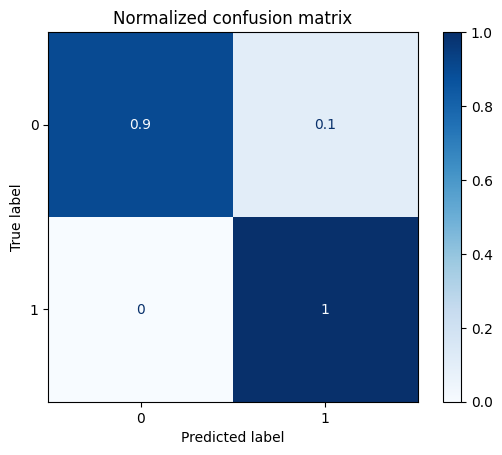

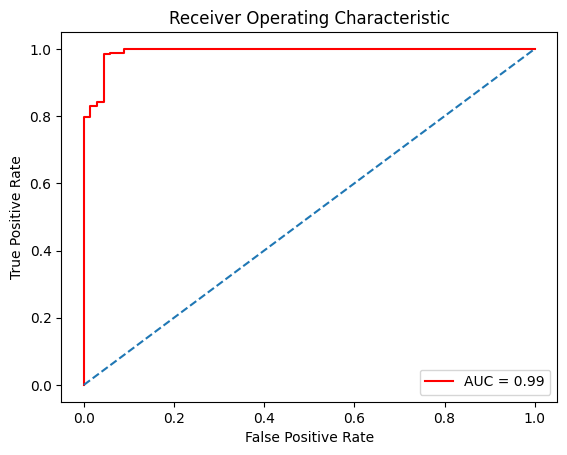

In [ ]:
sensibilidad_catb, roc_catb, gini_catb, classifier_catb = entrenamiento_modelo(X, y, 'CATB', 'None')

Se han truncado las últimas 5000 líneas del flujo de salida.
7:	learn: 0.0094276	total: 291ms	remaining: 36.1s
8:	learn: 0.0078549	total: 329ms	remaining: 36.3s
9:	learn: 0.0063582	total: 367ms	remaining: 36.3s
10:	learn: 0.0053121	total: 405ms	remaining: 36.4s
11:	learn: 0.0045543	total: 445ms	remaining: 36.6s
12:	learn: 0.0040214	total: 489ms	remaining: 37.2s
13:	learn: 0.0035857	total: 532ms	remaining: 37.4s
14:	learn: 0.0033958	total: 584ms	remaining: 38.3s
15:	learn: 0.0031712	total: 622ms	remaining: 38.3s
16:	learn: 0.0028789	total: 661ms	remaining: 38.2s
17:	learn: 0.0026027	total: 708ms	remaining: 38.6s
18:	learn: 0.0023029	total: 745ms	remaining: 38.5s
19:	learn: 0.0021904	total: 783ms	remaining: 38.3s
20:	learn: 0.0020440	total: 820ms	remaining: 38.2s
21:	learn: 0.0018671	total: 863ms	remaining: 38.4s
22:	learn: 0.0016787	total: 903ms	remaining: 38.4s
23:	learn: 0.0016187	total: 951ms	remaining: 38.7s
24:	learn: 0.0015054	total: 990ms	remaining: 38.6s
25:	learn: 0.0014200	tot

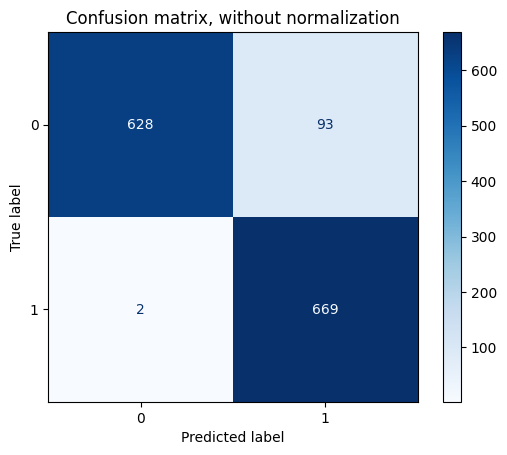

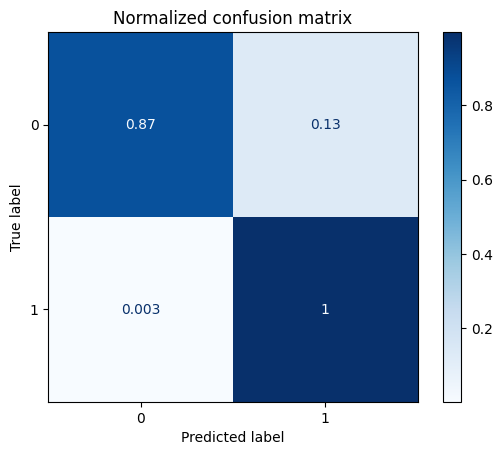

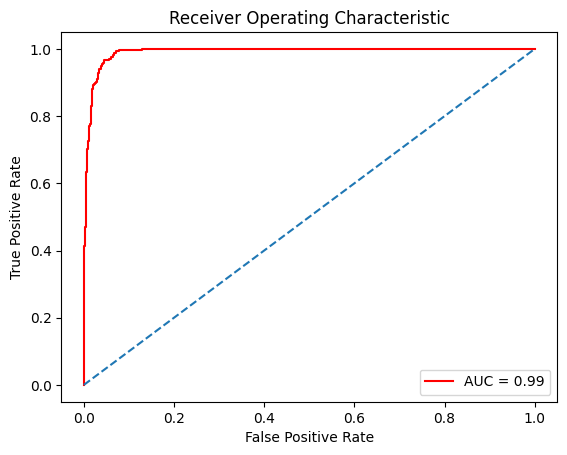

In [ ]:
sensibilidad_catb_smote, roc_catb_smote, gini_catb_smote, classifier_catb_smote = entrenamiento_modelo(X, y, 'CATB', 'S')

Se han truncado las últimas 5000 líneas del flujo de salida.
7:	learn: 0.0083449	total: 210ms	remaining: 26s
8:	learn: 0.0064988	total: 243ms	remaining: 26.7s
9:	learn: 0.0058363	total: 269ms	remaining: 26.6s
10:	learn: 0.0047862	total: 296ms	remaining: 26.6s
11:	learn: 0.0041639	total: 320ms	remaining: 26.4s
12:	learn: 0.0034198	total: 346ms	remaining: 26.2s
13:	learn: 0.0031368	total: 371ms	remaining: 26.1s
14:	learn: 0.0028360	total: 396ms	remaining: 26s
15:	learn: 0.0026670	total: 421ms	remaining: 25.9s
16:	learn: 0.0025293	total: 452ms	remaining: 26.1s
17:	learn: 0.0023564	total: 482ms	remaining: 26.3s
18:	learn: 0.0021936	total: 518ms	remaining: 26.7s
19:	learn: 0.0020740	total: 542ms	remaining: 26.6s
20:	learn: 0.0018569	total: 567ms	remaining: 26.4s
21:	learn: 0.0017632	total: 593ms	remaining: 26.4s
22:	learn: 0.0016627	total: 618ms	remaining: 26.3s
23:	learn: 0.0015744	total: 643ms	remaining: 26.1s
24:	learn: 0.0014452	total: 674ms	remaining: 26.3s
25:	learn: 0.0013929	total: 

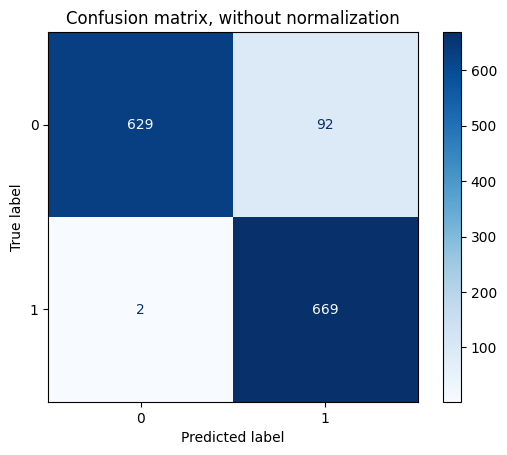

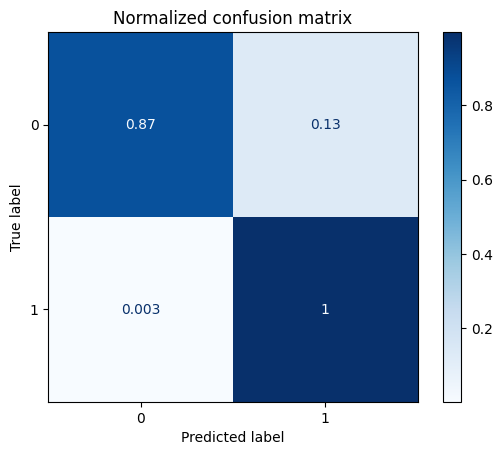

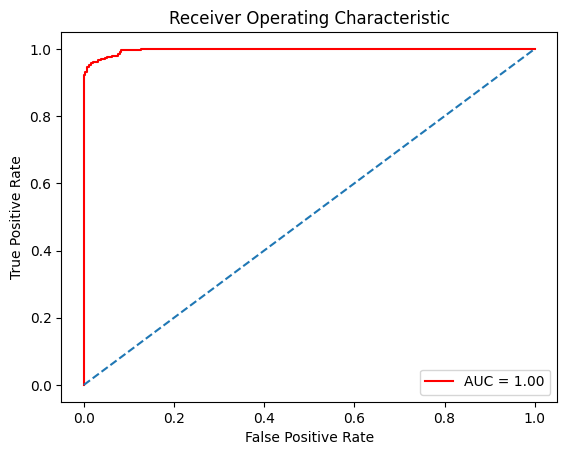

In [ ]:
sensibilidad_catb_over, roc_catb_over, gini_catb_over, classifier_catb_over = entrenamiento_modelo(X, y, 'CATB', 'O')

Se han truncado las últimas 5000 líneas del flujo de salida.
7:	learn: 0.0551986	total: 109ms	remaining: 13.6s
8:	learn: 0.0395841	total: 123ms	remaining: 13.6s
9:	learn: 0.0331081	total: 138ms	remaining: 13.6s
10:	learn: 0.0304224	total: 152ms	remaining: 13.6s
11:	learn: 0.0269906	total: 165ms	remaining: 13.6s
12:	learn: 0.0249569	total: 180ms	remaining: 13.6s
13:	learn: 0.0228257	total: 194ms	remaining: 13.7s
14:	learn: 0.0217808	total: 210ms	remaining: 13.8s
15:	learn: 0.0201575	total: 232ms	remaining: 14.2s
16:	learn: 0.0174756	total: 247ms	remaining: 14.3s
17:	learn: 0.0155757	total: 261ms	remaining: 14.2s
18:	learn: 0.0149868	total: 275ms	remaining: 14.2s
19:	learn: 0.0136236	total: 289ms	remaining: 14.2s
20:	learn: 0.0128622	total: 303ms	remaining: 14.1s
21:	learn: 0.0122437	total: 317ms	remaining: 14.1s
22:	learn: 0.0120252	total: 332ms	remaining: 14.1s
23:	learn: 0.0105579	total: 339ms	remaining: 13.8s
24:	learn: 0.0098292	total: 361ms	remaining: 14.1s
25:	learn: 0.0087190	tot

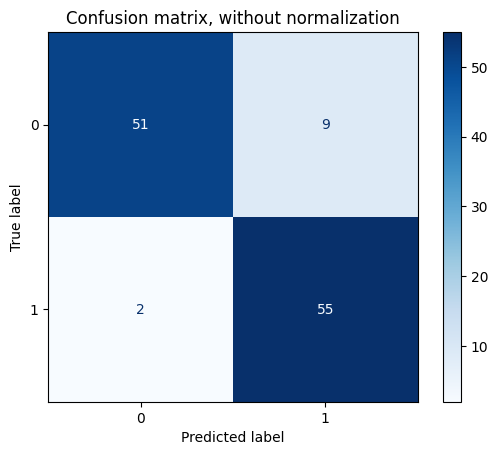

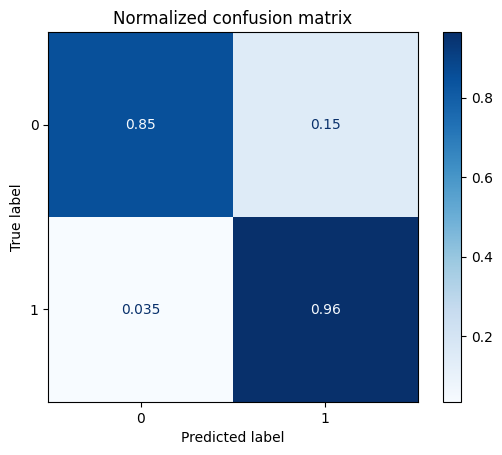

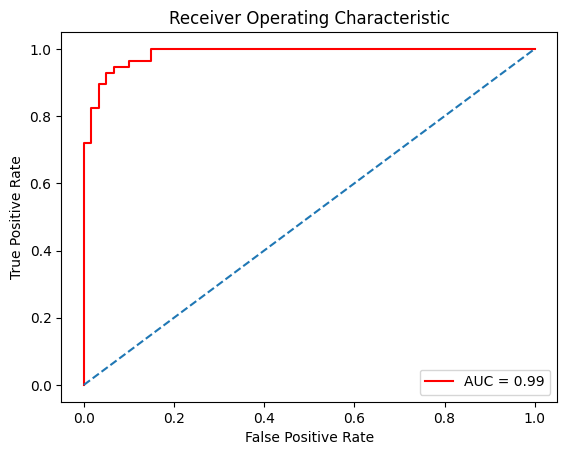

In [ ]:
sensibilidad_catb_under, roc_catb_under, gini_catb_under, classifier_catb_under = entrenamiento_modelo(X, y, 'CATB', 'U')

### Pruebas con LigthGBM

Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

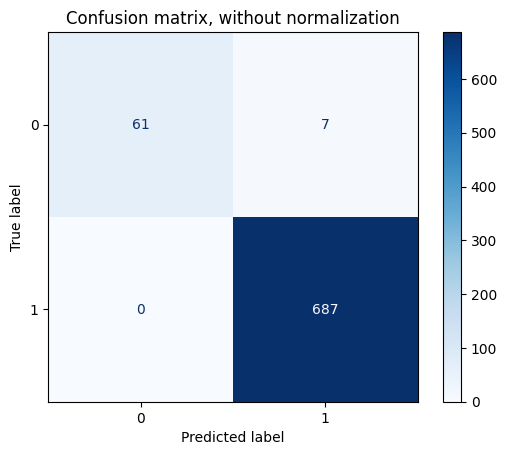

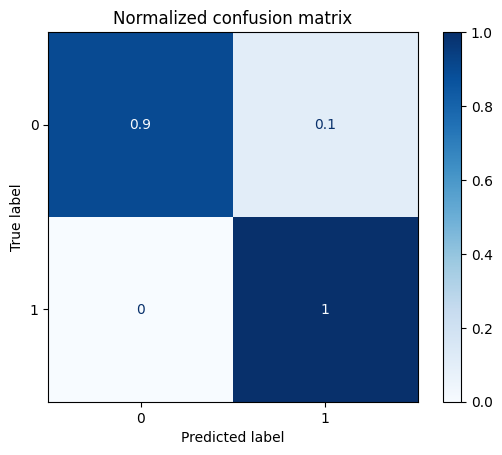

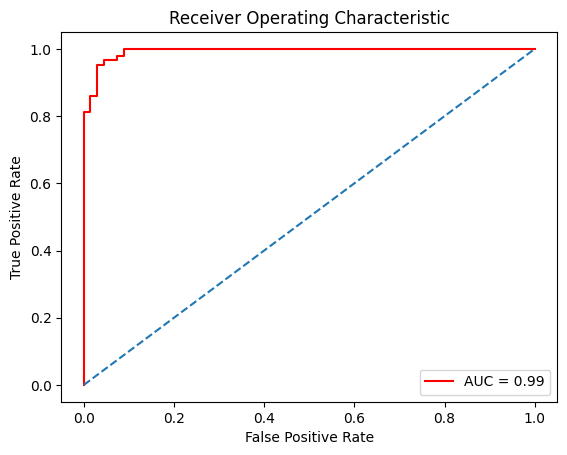

In [ ]:
sensibilidad_lbgm, roc_lgbm, gini_lgbm, classifier_lgbm = entrenamiento_modelo(X, y, 'LGBM', 'None')

Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

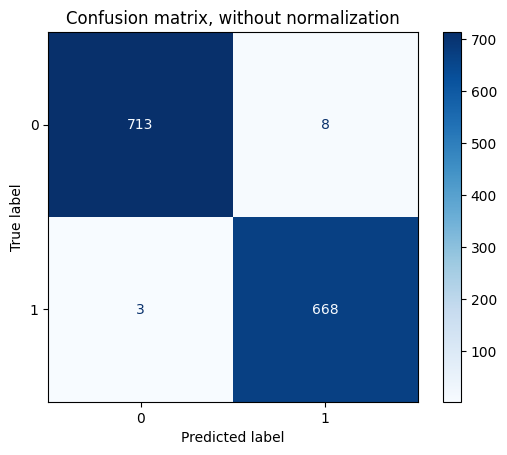

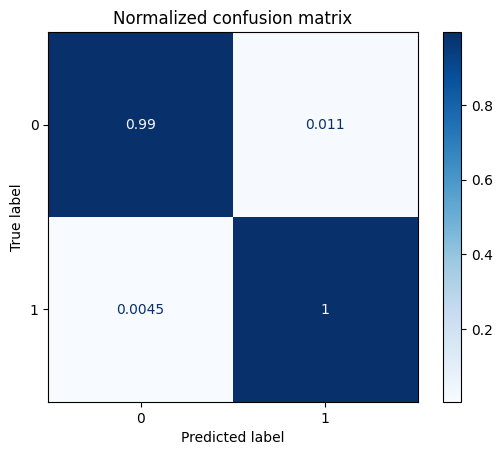

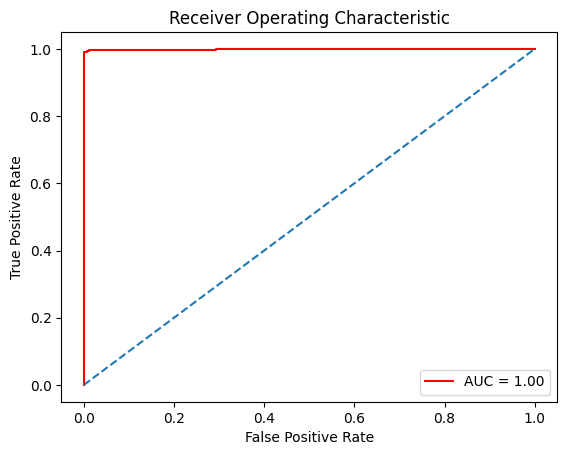

In [ ]:
sensibilidad_lbgm_smote, roc_lgbm_smote, gini_lgbm_smote, classifier_lgbm_smote = entrenamiento_modelo(X, y, 'LGBM', 'S')

Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

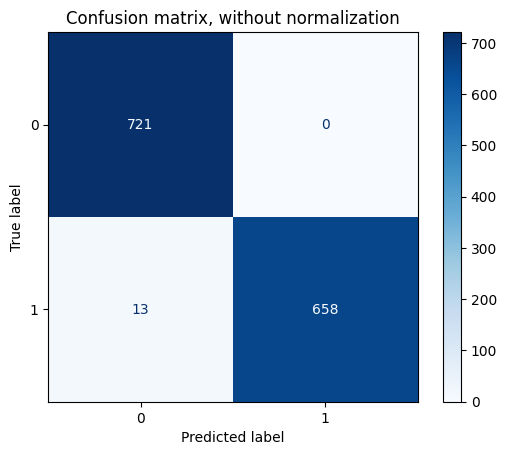

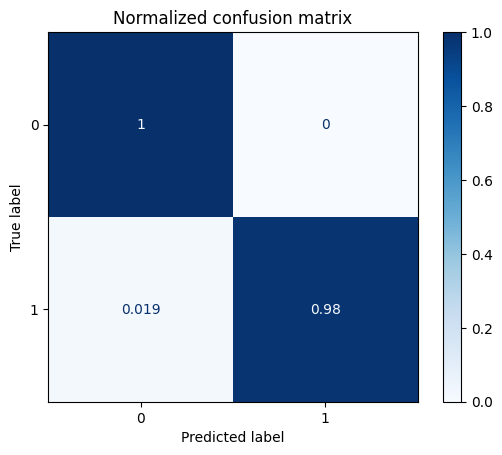

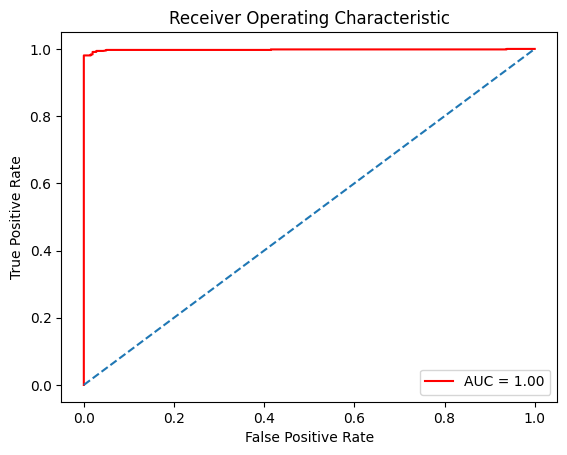

In [ ]:
sensibilidad_lbgm_over, roc_lgbm_over, gini_lgbm_over, classifier_lgbm_over = entrenamiento_modelo(X, y, 'LGBM', 'O')

Se han truncado las últimas 5000 líneas del flujo de salida.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits 

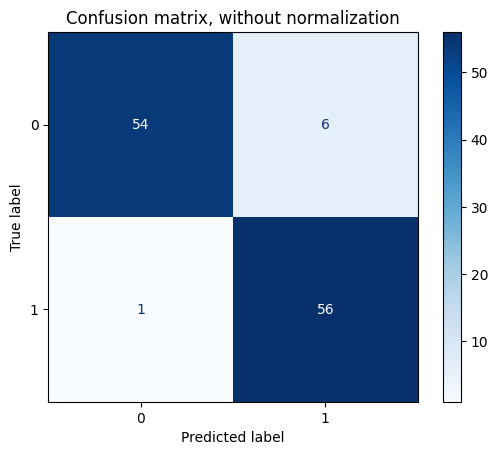

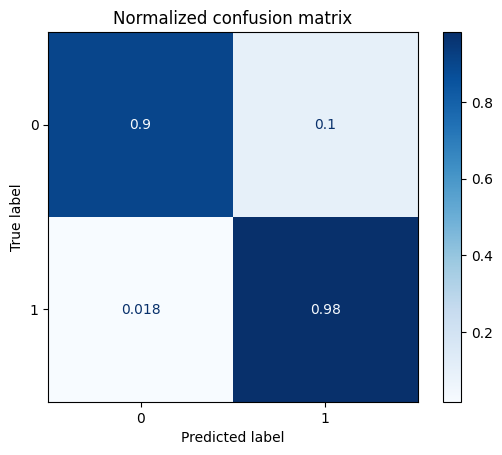

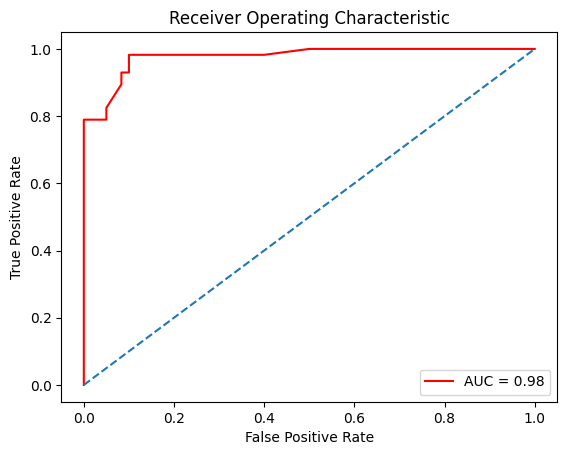

In [ ]:
sensibilidad_lbgm_under, roc_lgbm_under, gini_lgbm_under, classifier_lgbm_under = entrenamiento_modelo(X, y, 'LGBM', 'U')

### Tabla final

In [ ]:
t_f = {'Modelo': ['XGB - Base','XGB - SMOTE', 'XGB - OVER', 'XGB - UNDER',
                  'CatB - Base', 'CatB - SMOTE', 'CatB - OVER', 'CatB - UNDER',
                  'LGBM - Base', 'LGBM - SMOTE', 'LGBM - OVER', 'LGBM - UNDER'],
       'Sensibilidad': [sensibilidad_xgm, sensibilidad_xgm_smote, sensibilidad_xgm_over, sensibilidad_xgm_under,
                        sensibilidad_catb, sensibilidad_catb_smote, sensibilidad_catb_over, sensibilidad_catb_under,
                        sensibilidad_lbgm, sensibilidad_lbgm_smote, sensibilidad_lbgm_over, sensibilidad_lbgm_under],
       'ROC': [roc_xgb, roc_xgb_smote, roc_xgb_over, roc_xgb_under,
               roc_catb, roc_catb_smote, roc_catb_over, roc_catb_under,
               roc_lgbm, roc_lgbm_smote, roc_lgbm_over, roc_lgbm_under],
       'Gini': [gini_xgb, gini_xgb_smote, gini_xgb_over, gini_xgb_under,
                gini_catb, gini_catb_smote, gini_catb_over, gini_catb_under,
                gini_lgbm, gini_lgbm_smote, gini_lgbm_over, gini_lgbm_under]}

In [ ]:
tf_dataframe = pd.DataFrame(t_f)
tf_dataframe.to_csv('/content/drive/MyDrive/mda/Trabajo Final/Resultados/results.csv', index=False)

In [ ]:
tf_dataframe

Modelo  Sensibilidad       ROC      Gini
0     XGB - Base      1.000000  0.996596  0.993193
1    XGB - SMOTE      0.994039  0.998100  0.996201
2     XGB - OVER      0.998510  0.992877  0.985754
3    XGB - UNDER      1.000000  0.922368  0.844737
4    CatB - Base      1.000000  0.991630  0.983261
5   CatB - SMOTE      0.997019  0.990473  0.980946
6    CatB - OVER      0.997019  0.996902  0.993803
7   CatB - UNDER      0.964912  0.985965  0.971930
8    LGBM - Base      1.000000  0.993236  0.986471
9   LGBM - SMOTE      0.995529  0.998516  0.997032
10   LGBM - OVER      0.980626  0.997568  0.995136
11  LGBM - UNDER      0.982456  0.977485  0.954971

### Guardar modelos

In [ ]:
import pickle

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/xgb.pkl', 'wb') as archivo:
    pickle.dump(classifier_xgb, archivo)

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/xgb_smote.pkl', 'wb') as archivo:
    pickle.dump(classifier_xgb_smote, archivo)

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/xgb_over.pkl', 'wb') as archivo:
    pickle.dump(classifier_xgb_over, archivo)

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/xgb_under.pkl', 'wb') as archivo:
    pickle.dump(classifier_xgb_under, archivo)

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/catb.pkl', 'wb') as archivo:
    pickle.dump(classifier_catb, archivo)

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/catb_smote.pkl', 'wb') as archivo:
    pickle.dump(classifier_catb_smote, archivo)

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/catb_over.pkl', 'wb') as archivo:
    pickle.dump(classifier_catb_over, archivo)

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/catb_under.pkl', 'wb') as archivo:
    pickle.dump(classifier_catb_under, archivo)

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/lgbm.pkl', 'wb') as archivo:
    pickle.dump(classifier_lgbm, archivo)

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/lgbm_smote.pkl', 'wb') as archivo:
    pickle.dump(classifier_lgbm_smote, archivo)

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/lgbm_over.pkl', 'wb') as archivo:
    pickle.dump(classifier_lgbm_over, archivo)

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/lgbm_under.pkl', 'wb') as archivo:
    pickle.dump(classifier_lgbm_under, archivo)

# Prueba de mejores modelos

In [ ]:
# Lectura de modelos
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/xgb_smote.pkl', 'rb') as archivo:
    modelo_xgb_smote = pickle.load(archivo)

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/catb_over.pkl', 'rb') as archivo:
    modelo_catb_over = pickle.load(archivo)

In [ ]:
with open('/content/drive/MyDrive/mda/Trabajo Final/Modelos/lgbm_over.pkl', 'rb') as archivo:
    modelo_lbgm_over = pickle.load(archivo)

Curva ROC de los modelos

In [ ]:
def curv_roc(classifier, X_var, y_var, balance):
  if balance=='S':
        smt = SMOTE()
        X_smote, y_smote = smt.fit_resample(X_var, y_var)
        X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size = 0.20, random_state = 0)

  elif balance=='O':
        oversample = RandomOverSampler()
        X_over, y_over = oversample.fit_resample(X_var, y_var)
        X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.20, random_state = 0)

  elif balance=='U':
        undersample = RandomUnderSampler()
        X_under, y_under = undersample.fit_resample(X_var, y_var)
        X_train, X_test, y_train, y_test = train_test_split(X_under, y_under, test_size = 0.20, random_state = 0)

  elif balance=='None':
        X_train, X_test, y_train, y_test = train_test_split(X_var, y_var, test_size = 0.20, random_state = 0)

  X_train_orig = X_train
  X_test_orig = X_test
  X_train = StandardScaler().fit_transform(X_train)
  X_test = StandardScaler().fit_transform(X_test)




  y_pred_prob = classifier.predict_proba(X_test)
  false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])
  roc_auc = auc(false_positive_rate, true_positive_rate)

  plt.figure(figsize=(8, 8))
  plt.title('Receiver Operating Characteristic')
  plt.plot(false_positive_rate, true_positive_rate, color='red',label = 'AUC = %0.4f' % roc_auc)
  plt.legend(loc = 'lower right')
  plt.plot([0, 1], [0, 1],linestyle='--')
  plt.axis('tight')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.show()

  return roc_auc, false_positive_rate, true_positive_rate

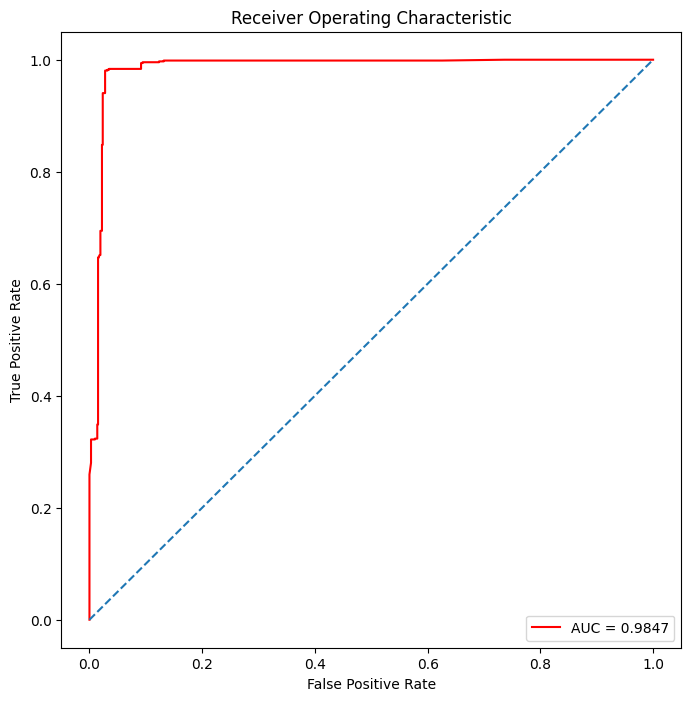

In [ ]:
auc_xgb, f_p_r_xgb, t_p_r_xgb = curv_roc(modelo_xgb_smote, X, y, 'S')

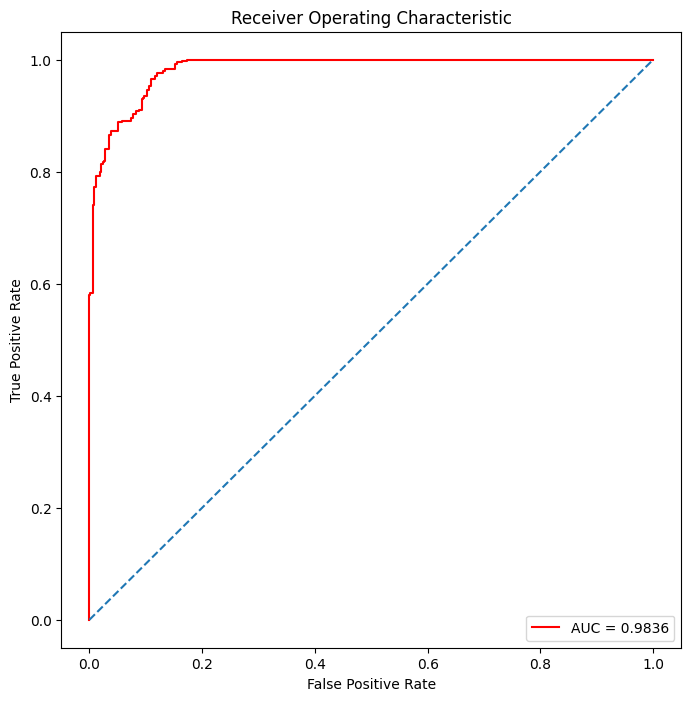

In [ ]:
auc_catb, f_p_r_catb, t_p_r_carb = curv_roc(modelo_catb_over, X, y, 'O')

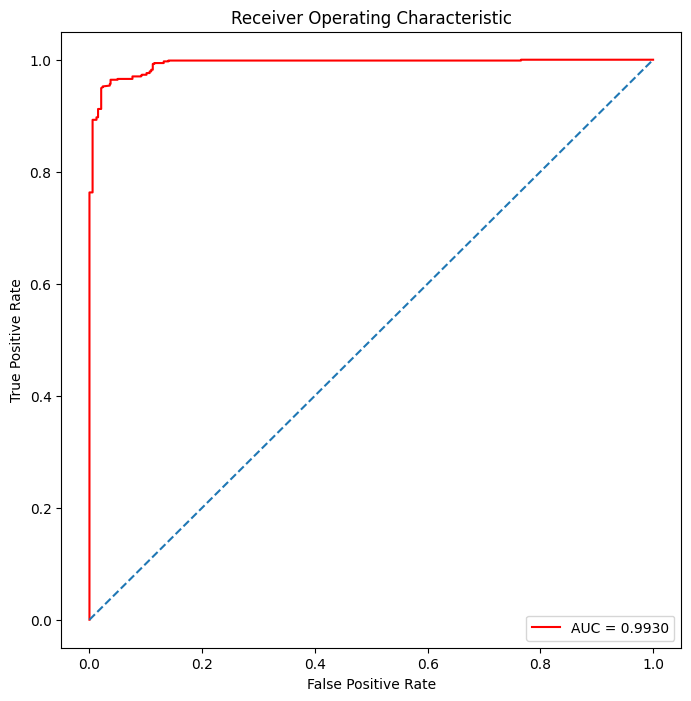

In [ ]:
auc_lgbm, f_p_r_lgbm, t_p_r_lgbm = curv_roc(modelo_lbgm_over, X, y, 'O')

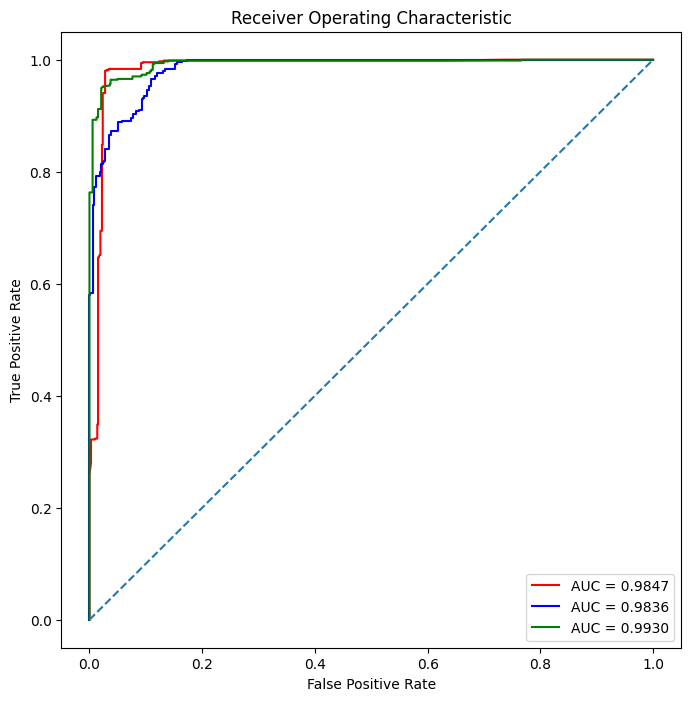

In [ ]:
plt.figure(figsize=(8, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(f_p_r_xgb, t_p_r_xgb, color='red',label = 'AUC = %0.4f' % auc_xgb)
plt.plot(f_p_r_catb, t_p_r_carb, color='blue',label = 'AUC = %0.4f' % auc_catb)
plt.plot(f_p_r_lgbm, t_p_r_lgbm, color='green',label = 'AUC = %0.4f' % auc_lgbm)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()